# T4 - 3 - Regresion Lineal- Validación del Modelo
## Dividir dataset en conjunto de entrenamiento y de testing



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from IPython.display import Image # para incluir imagenes local

In [2]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### creación del repartidor
El repartidor será una distribución aleatoria normal del mismo tamaño que nuestra muestra. Luego nos quedaremos con los que se correspondan con un valor en el repartidor < 0.8


(array([ 5., 12., 17., 29., 37., 34., 30., 16., 12.,  8.]),
 array([-2.11126006, -1.69111013, -1.27096021, -0.85081029, -0.43066036,
        -0.01051044,  0.40963949,  0.82978941,  1.24993934,  1.67008926,
         2.09023919]),
 <a list of 10 Patch objects>)

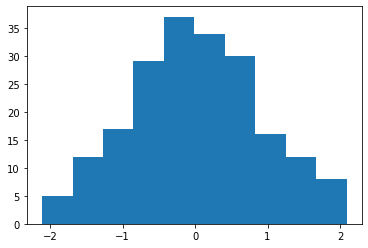

In [7]:
a = np.random.randn(len(data_ads))
plt.hist(a)

In [14]:
check = (a<0.8)
training = data_ads[check]
testing = data_ads[~check]

### Creación del modelo a partir de training

In [17]:
lm = smf.ols(formula = "Sales ~ TV + Radio", data=data_ads).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        22:59:43   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analizamos el modelo.
- R-squared:	0.897 muy bueno, próximo a 1
- Prob (F-statistic):	4.83e-98 rechazamos la hipótesis nula con confianza
- P>|t| es 0 para ambas
- el intervalo de confianza de ambas no está centrado en el cero

Confirmamos:
Sales = 2.9211 + 0.0458*TV + 0.1*Radio

### Validación con el grupo de testing


In [24]:
sales_pred = lm.predict(testing)
pd.concat([sales_pred, testing], axis=1, sort=False).head()

,0,TV,Radio,Newspaper,Sales
3,17.617116,151.5,41.3,58.5,18.5
5,12.512084,8.7,48.9,75.0,7.2
6,11.718212,57.5,32.8,23.5,11.8
25,15.608021,262.9,3.5,19.5,12.0
27,17.046335,240.1,16.7,22.9,15.9


In [26]:
# Podemos calcular la RSE
SSD = sum((testing["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.7245471692850245

In [28]:
# tanto por ciento de ventas que no explica
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
f"{error*100}%"

'11.454556843959573%'

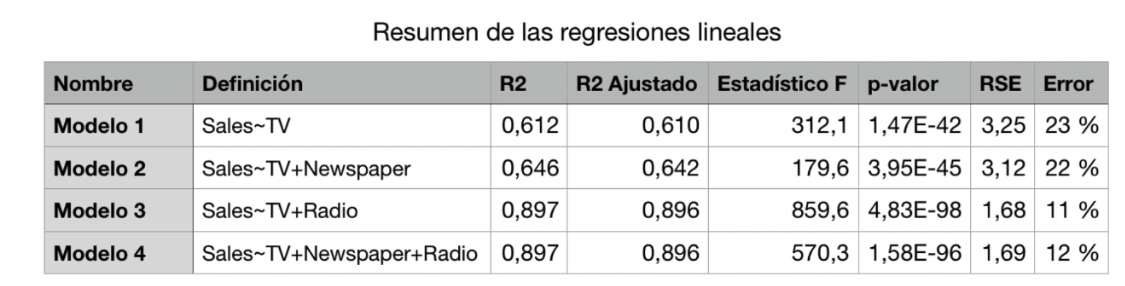

In [3]:
Image("./T4 - 4.png")